# San Jose Homeowner Occupancy Data Exploration
This notebook explores 2019 ACS data on home occupancy tenure (are homes occupied by owners or renters?) in the San Jose metropolitan area*. We are using a geoJSON file from the census reporter website that uses census tract data from the San Jose-Sunnyvale-Santa Clara, CA metropolitan area. 

Author: Antara Murshed

*I am noticing that while the census reporter has labeled the geography as San Jose Sunnyvale Santa Clara, the actual area covered goes well beyond that into Alameda and Santa Cruz Counties. But we're not against looking at those areas 

In [2]:
#import relevant libraries and the geoJSON file

import pandas as pd
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt 

sjgdf = gpd.read_file('acs19.geojson')

/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


Let's take a look at what the file looks like, including what the data types are, what the data looks like plotted, and what the columns are named. 

In [3]:
sjgdf.head

<bound method NDFrame.head of                   geoid                               name  B25003001  \
0    14000US06001441503  Census Tract 4415.03, Alameda, CA     2394.0   
1    14000US06001443200     Census Tract 4432, Alameda, CA     1225.0   
2    14000US06001443301  Census Tract 4433.01, Alameda, CA     1286.0   
3    14000US06001450701  Census Tract 4507.01, Alameda, CA     2785.0   
4    14000US06001451101  Census Tract 4511.01, Alameda, CA     2630.0   
..                  ...                                ...        ...   
415  14000US06087121000  Census Tract 1210, Santa Cruz, CA     1372.0   
416  14000US06087122400  Census Tract 1224, Santa Cruz, CA     2608.0   
417  14000US06087123300  Census Tract 1233, Santa Cruz, CA      406.0   
418  14000US06099003300    Census Tract 33, Stanislaus, CA     1684.0   
419  14000US06099003400    Census Tract 34, Stanislaus, CA      536.0   

     B25003001, Error  B25003002  B25003002, Error  B25003003  \
0               108.0     18

<AxesSubplot:>

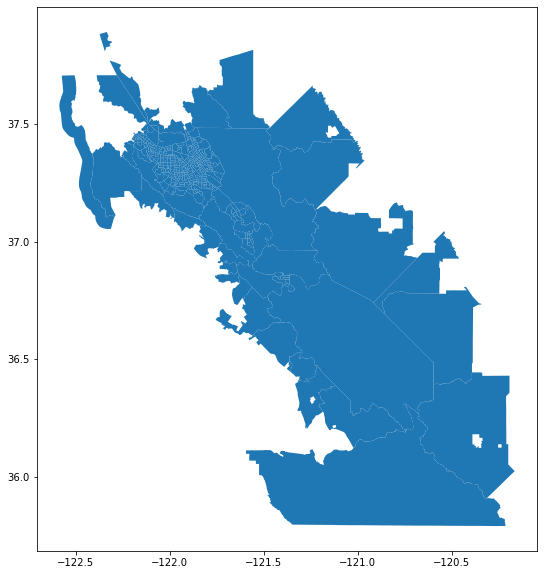

In [6]:
sjgdf.plot (figsize=(10,10))

In [4]:
sjgdf.dtypes

geoid                 object
name                  object
B25003001            float64
B25003001, Error     float64
B25003002            float64
B25003002, Error     float64
B25003003            float64
B25003003, Error     float64
geometry            geometry
dtype: object

In [5]:
sjgdf.columns.to_list()

['geoid',
 'name',
 'B25003001',
 'B25003001, Error',
 'B25003002',
 'B25003002, Error',
 'B25003003',
 'B25003003, Error',
 'geometry']

The column names are explained in the metadata file, I'm going to rename them so I can actually see what they mean.

In [8]:
sjgdf.sample()

,geoid,name,B25003001,"B25003001, Error",B25003002,"B25003002, Error",B25003003,"B25003003, Error",geometry
11,14000US06053010202,"Census Tract 102.02, Monterey, CA",1302.0,102.0,951.0,105.0,351.0,103.0,"MULTIPOLYGON (((-121.75996 36.84985, -121.7599..."


In [9]:
sjgdf.head()

,geoid,name,B25003001,"B25003001, Error",B25003002,"B25003002, Error",B25003003,"B25003003, Error",geometry
0,14000US06001441503,"Census Tract 4415.03, Alameda, CA",2394.0,108.0,1843.0,133.0,551.0,119.0,"MULTIPOLYGON (((-122.13161 37.56289, -122.1313..."
1,14000US06001443200,"Census Tract 4432, Alameda, CA",1225.0,26.0,1198.0,38.0,27.0,30.0,"MULTIPOLYGON (((-121.92300 37.49558, -121.9229..."
2,14000US06001443301,"Census Tract 4433.01, Alameda, CA",1286.0,25.0,1087.0,88.0,199.0,84.0,"MULTIPOLYGON (((-121.92094 37.47505, -121.9209..."
3,14000US06001450701,"Census Tract 4507.01, Alameda, CA",2785.0,160.0,2485.0,165.0,300.0,147.0,"MULTIPOLYGON (((-121.93292 37.57614, -121.9323..."
4,14000US06001451101,"Census Tract 4511.01, Alameda, CA",2630.0,135.0,2189.0,184.0,441.0,138.0,"MULTIPOLYGON (((-121.80311 37.62864, -121.8030..."


In [11]:
sjgdf.columns = ['geoid',
                 'name',
                 'Total',
                 'Total,Error',
                 'Owner Occupied',
                 'Owner Occupied, Error',
                 'Renter Occupied',
                 'Renter Occupied, Error',
                 'geometry']

In [12]:
sjgdf.head()

,geoid,name,Total,"Total,Error",Owner Occupied,"Owner Occupied, Error",Renter Occupied,"Renter Occupied, Error",geometry
0,14000US06001441503,"Census Tract 4415.03, Alameda, CA",2394.0,108.0,1843.0,133.0,551.0,119.0,"MULTIPOLYGON (((-122.13161 37.56289, -122.1313..."
1,14000US06001443200,"Census Tract 4432, Alameda, CA",1225.0,26.0,1198.0,38.0,27.0,30.0,"MULTIPOLYGON (((-121.92300 37.49558, -121.9229..."
2,14000US06001443301,"Census Tract 4433.01, Alameda, CA",1286.0,25.0,1087.0,88.0,199.0,84.0,"MULTIPOLYGON (((-121.92094 37.47505, -121.9209..."
3,14000US06001450701,"Census Tract 4507.01, Alameda, CA",2785.0,160.0,2485.0,165.0,300.0,147.0,"MULTIPOLYGON (((-121.93292 37.57614, -121.9323..."
4,14000US06001451101,"Census Tract 4511.01, Alameda, CA",2630.0,135.0,2189.0,184.0,441.0,138.0,"MULTIPOLYGON (((-121.80311 37.62864, -121.8030..."


Let's drop the error columns because I probably won't be using them right now.  

In [15]:
keepcolumns = ['geoid', 'name',
               'Total', 'Owner Occupied',
               'Renter Occupied', 'geometry']

In [16]:
sjgdf = sjgdf[keepcolumns]

In [17]:
sjgdf.head()

,geoid,name,Total,Owner Occupied,Renter Occupied,geometry
0,14000US06001441503,"Census Tract 4415.03, Alameda, CA",2394.0,1843.0,551.0,"MULTIPOLYGON (((-122.13161 37.56289, -122.1313..."
1,14000US06001443200,"Census Tract 4432, Alameda, CA",1225.0,1198.0,27.0,"MULTIPOLYGON (((-121.92300 37.49558, -121.9229..."
2,14000US06001443301,"Census Tract 4433.01, Alameda, CA",1286.0,1087.0,199.0,"MULTIPOLYGON (((-121.92094 37.47505, -121.9209..."
3,14000US06001450701,"Census Tract 4507.01, Alameda, CA",2785.0,2485.0,300.0,"MULTIPOLYGON (((-121.93292 37.57614, -121.9323..."
4,14000US06001451101,"Census Tract 4511.01, Alameda, CA",2630.0,2189.0,441.0,"MULTIPOLYGON (((-121.80311 37.62864, -121.8030..."


Now the geodataframe is trimmed down and the columns are labeled, we can look at some statistics regarding the total number of occupied homes reported in the 2019 ACS in this area.  

In [18]:
sjgdf['Total'].describe()

count     420.000000
mean     1703.490476
std       708.128491
min         0.000000
25%      1211.000000
50%      1596.500000
75%      2126.500000
max      5335.000000
Name: Total, dtype: float64

Now I'll plot the total column as a histogram, showing the frequency of occupied housing units

<AxesSubplot:ylabel='Frequency'>

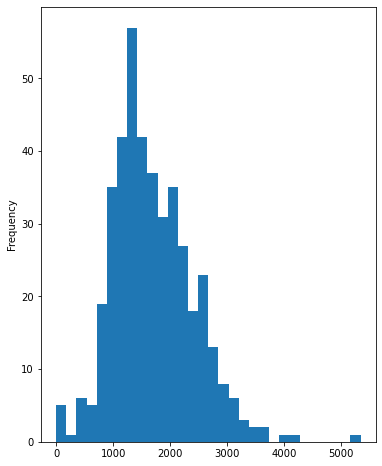

In [25]:
sjgdf['Total'].plot.hist(figsize=(6,8),bins=30)

Since the dataframe lists the totals across the census tracts, it would be useful to normalize the data in order to be able to compare the census tracts to each other. Let's create new columns normalizing renter occupied and owner occupied totals.

In [27]:
sjgdf['Percent Owner Occupied'] = (sjgdf['Owner Occupied']/sjgdf['Total'])*100
sjgdf['Percent Renter Occupied'] = (sjgdf['Renter Occupied']/sjgdf['Total'])*100

In [29]:
sjgdf.sample(8)

,geoid,name,Total,Owner Occupied,Renter Occupied,geometry,Percent Owner Occupied,Percent Renter Occupied
311,14000US06085509303,"Census Tract 5093.03, Santa Clara, CA",1734.0,605.0,1129.0,"MULTIPOLYGON (((-122.09745 37.40302, -122.0973...",34.890427,65.109573
340,14000US06085511302,"Census Tract 5113.02, Santa Clara, CA",2003.0,519.0,1484.0,"MULTIPOLYGON (((-122.17014 37.44729, -122.1694...",25.911133,74.088867
8,14000US06019008402,"Census Tract 84.02, Fresno, CA",300.0,107.0,193.0,"MULTIPOLYGON (((-120.91633 36.74227, -120.9155...",35.666667,64.333333
365,14000US06085512020,"Census Tract 5120.20, Santa Clara, CA",2562.0,495.0,2067.0,"MULTIPOLYGON (((-121.84175 37.27703, -121.8414...",19.320843,80.679157
403,14000US06085512503,"Census Tract 5125.03, Santa Clara, CA",2639.0,2192.0,447.0,"MULTIPOLYGON (((-121.65743 37.03285, -121.6574...",83.061766,16.938234
173,14000US06085504319,"Census Tract 5043.19, Santa Clara, CA",2461.0,1864.0,597.0,"MULTIPOLYGON (((-121.88070 37.36801, -121.8805...",75.741568,24.258432
66,14000US06085502101,"Census Tract 5021.01, Santa Clara, CA",1947.0,1230.0,717.0,"MULTIPOLYGON (((-121.94059 37.30536, -121.9405...",63.174114,36.825886
179,14000US06085504411,"Census Tract 5044.11, Santa Clara, CA",1530.0,1184.0,346.0,"MULTIPOLYGON (((-121.87505 37.41601, -121.8748...",77.385621,22.614379


Graphing Percent Renter occupied and Percent Owner occupied on histograms shows us the frequency of each across the dataset. 

<AxesSubplot:ylabel='Frequency'>

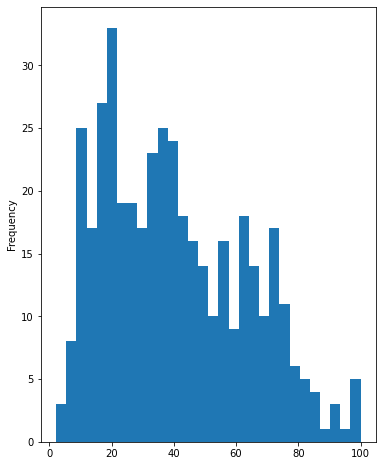

In [30]:
sjgdf['Percent Renter Occupied'].plot.hist(figsize=(6,8),bins=30)

<AxesSubplot:ylabel='Frequency'>

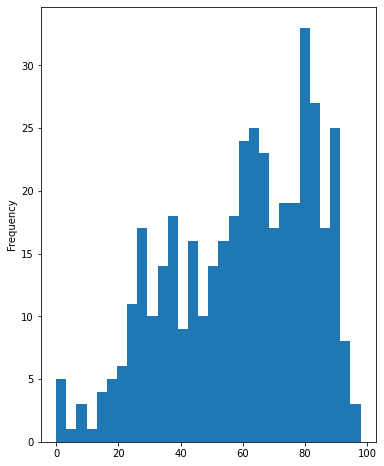

In [32]:
sjgdf['Percent Owner Occupied'].plot.hist(figsize=(6,8),bins=30)

We can sort the data to learn more too. Which Census tract has the highest percentage of renter occupied units and which has the highest percentage of owner occupied units?

In [39]:
sjgdf_trou =sjgdf.sort_values(by='Percent Renter Occupied',ascending = False)                          

In [40]:
sjgdf_trou[['name','Percent Renter Occupied']].head(10)

,name,Percent Renter Occupied
197,"Census Tract 5047, Santa Clara, CA",100.000000
206,"Census Tract 5050.08, Santa Clara, CA",99.598739
305,"Census Tract 5091.07, Santa Clara, CA",98.303342
412,"Census Tract 5130, Santa Clara, CA",97.991335
50,"Census Tract 5009.02, Santa Clara, CA",97.508897
343,"Census Tract 5116.08, Santa Clara, CA",96.226415
51,"Census Tract 5010, Santa Clara, CA",92.502142
344,"Census Tract 5116.09, Santa Clara, CA",91.428571
314,"Census Tract 5094.03, Santa Clara, CA",91.085613
316,"Census Tract 5095, Santa Clara, CA",87.824176


All 10 census tracts with the highest percentage of renters are in Santa Clara, CA. Now let's look at the highest percentage owner occupied units. 

In [41]:
sjgdf_toou=sjgdf.sort_values(by= 'Percent Owner Occupied',ascending = False)

In [43]:
sjgdf_toou[['name','Percent Owner Occupied']].head(10)

,name,Percent Owner Occupied
1,"Census Tract 4432, Alameda, CA",97.795918
357,"Census Tract 5119.13, Santa Clara, CA",97.287652
353,"Census Tract 5119.09, Santa Clara, CA",95.324284
132,"Census Tract 5033.34, Santa Clara, CA",94.365657
325,"Census Tract 5101, Santa Clara, CA",93.731919
323,"Census Tract 5100.01, Santa Clara, CA",93.489066
394,"Census Tract 5123.08, Santa Clara, CA",92.657078
130,"Census Tract 5033.32, Santa Clara, CA",92.448424
347,"Census Tract 5117.04, Santa Clara, CA",92.256503
125,"Census Tract 5033.26, Santa Clara, CA",92.179700


Okay 9 out of 10 of the census tracts with the highest percentage of owner occupied units are also in Santa Clara. I'm going to map the percentages now to see if I can understand this better. 

<AxesSubplot:>

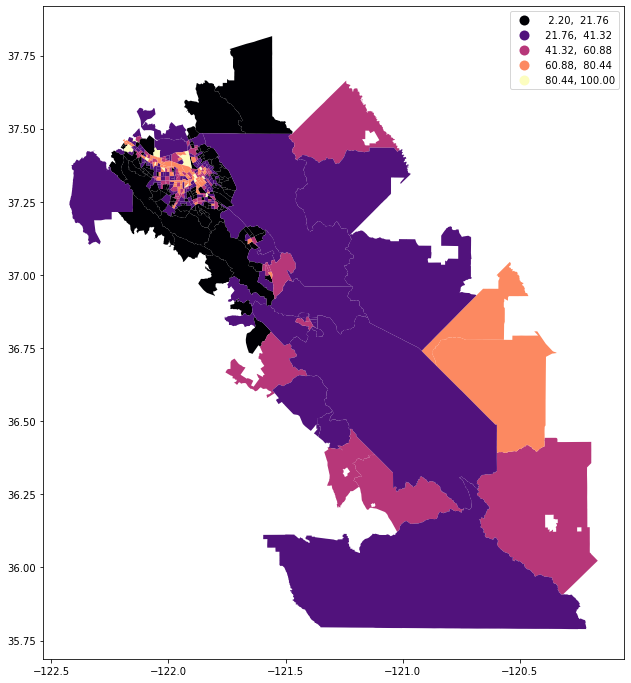

In [59]:
sjgdf.plot(figsize=(12,12),
           column='Percent Renter Occupied',
           legend=True,
           scheme='equal_interval',
           cmap=('magma'))

Above is a map showing the distribution of the owner occupied units in the San Jose-Sunnyvale-Santa Clara area. The census tracts with the highest variation among each other and the highest percentage of renters are in the San Jose/Santa Clara area. 